# PROJET STT-3795 | Système de Recommandation
## Analyse Exploratoire des Données MovieLens 100K

**Objectifs :**
- Comprendre la structure et la qualité des données MovieLens 100K
- Identifier les patterns et tendances dans les évaluations
- Préparer les données pour le développement d'un système de recommandation
- Détecter les biais potentiels et valeurs aberrantes

**Dataset :** MovieLens 100K - 100,000 évaluations de films par 943 utilisateurs sur 1,682 films

**Auteur :** [Votre nom]  
**Date :** [Date actuelle]

## 1. Configuration et Chargement des Données

Nous commençons par importer les bibliothèques nécessaires et charger les données
à l'aide de notre module utilitaire personnalisé.

In [25]:
# Imports des bibliothèques standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Import de nos fonctions utilitaires
from utils import (
    load_movielens_data, 
    get_data_summary,
    create_movie_stats,
    plot_rating_distribution,
    plot_movie_popularity,
    analyze_genres,
    create_user_movie_matrix
)

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

### 1.1 Chargement des Données

In [26]:
# Chargement des données MovieLens 100K
DATA_PATH = "ml-100k/"

print("🚀 Chargement des données MovieLens 100K...")
ratings_df, movies_df, users_df = load_movielens_data(DATA_PATH)

# Vérification de la structure des données
if ratings_df is not None:
    print("\n📋 Aperçu des données :")
    print("\n• Évaluations (ratings) :")
    display(ratings_df.head())
    
    print("\n• Films (movies) :")
    display(movies_df.head())
    
    print("\n• Utilisateurs (users) :")
    display(users_df.head())

🚀 Chargement des données MovieLens 100K...
✅ Données chargées avec succès !
   • 100,000 évaluations
   • 1,682 films
   • 943 utilisateurs

📋 Aperçu des données :

• Évaluations (ratings) :


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596



• Films (movies) :


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0



• Utilisateurs (users) :


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 1.2 Résumé des Données

Obtenons une vue d'ensemble complète de notre dataset.

In [27]:
# Affichage du résumé complet
if ratings_df is not None:
    get_data_summary(ratings_df, movies_df, users_df)

📊 RÉSUMÉ DES DONNÉES MOVIELENS 100K

🎬 STATISTIQUES GÉNÉRALES
• Nombre d'évaluations : 100,000
• Nombre de films : 1,682
• Nombre d'utilisateurs : 943
• Période temporelle : 1997-09-20 - 1998-04-22

⭐ STATISTIQUES DES ÉVALUATIONS
• Note moyenne : 3.53/5
• Écart-type : 1.13
• Distribution des notes :
  - 1⭐ : 6,110 (6.1%)
  - 2⭐ : 11,370 (11.4%)
  - 3⭐ : 27,145 (27.1%)
  - 4⭐ : 34,174 (34.2%)
  - 5⭐ : 21,201 (21.2%)

👥 STATISTIQUES DES UTILISATEURS
• Âge moyen : 34.1 ans
• Répartition par genre : {'M': 670, 'F': 273}
• Nombre d'évaluations par utilisateur : 106.0

🎭 TOP GENRES
• Drama : 725 films
• Comedy : 505 films
• Action : 251 films
• Thriller : 251 films
• Romance : 247 films


## 2. Analyse des Évaluations

Analysons les patterns dans les évaluations des utilisateurs.

In [28]:
# Analyse statistique des évaluations
print("📊 ANALYSE DÉTAILLÉE DES ÉVALUATIONS")
print("=" * 50)

# Statistiques descriptives
print("\n📈 Statistiques descriptives :")
stats_summary = ratings_df['rating'].describe()
print(stats_summary)

# Test de normalité
shapiro_stat, shapiro_p = stats.shapiro(ratings_df['rating'].sample(5000))  # Échantillon pour le test
print(f"\n🔍 Test de normalité (Shapiro-Wilk) :")
print(f"• Statistique : {shapiro_stat:.4f}")
print(f"• p-value : {shapiro_p:.2e}")
print(f"• Distribution normale : {'Non' if shapiro_p < 0.05 else 'Oui'}")

# Mode et asymétrie
mode = ratings_df['rating'].mode()[0]
skewness = ratings_df['rating'].skew()
kurtosis = ratings_df['rating'].kurtosis()

print(f"\n📊 Mesures de forme :")
print(f"• Mode : {mode}")
print(f"• Asymétrie (skewness) : {skewness:.3f}")
print(f"• Aplatissement (kurtosis) : {kurtosis:.3f}")

📊 ANALYSE DÉTAILLÉE DES ÉVALUATIONS

📈 Statistiques descriptives :
count    100000.000
mean          3.530
std           1.126
min           1.000
25%           3.000
50%           4.000
75%           4.000
max           5.000
Name: rating, dtype: float64

🔍 Test de normalité (Shapiro-Wilk) :
• Statistique : 0.8931
• p-value : 2.45e-50
• Distribution normale : Non

📊 Mesures de forme :
• Mode : 4
• Asymétrie (skewness) : -0.510
• Aplatissement (kurtosis) : -0.413


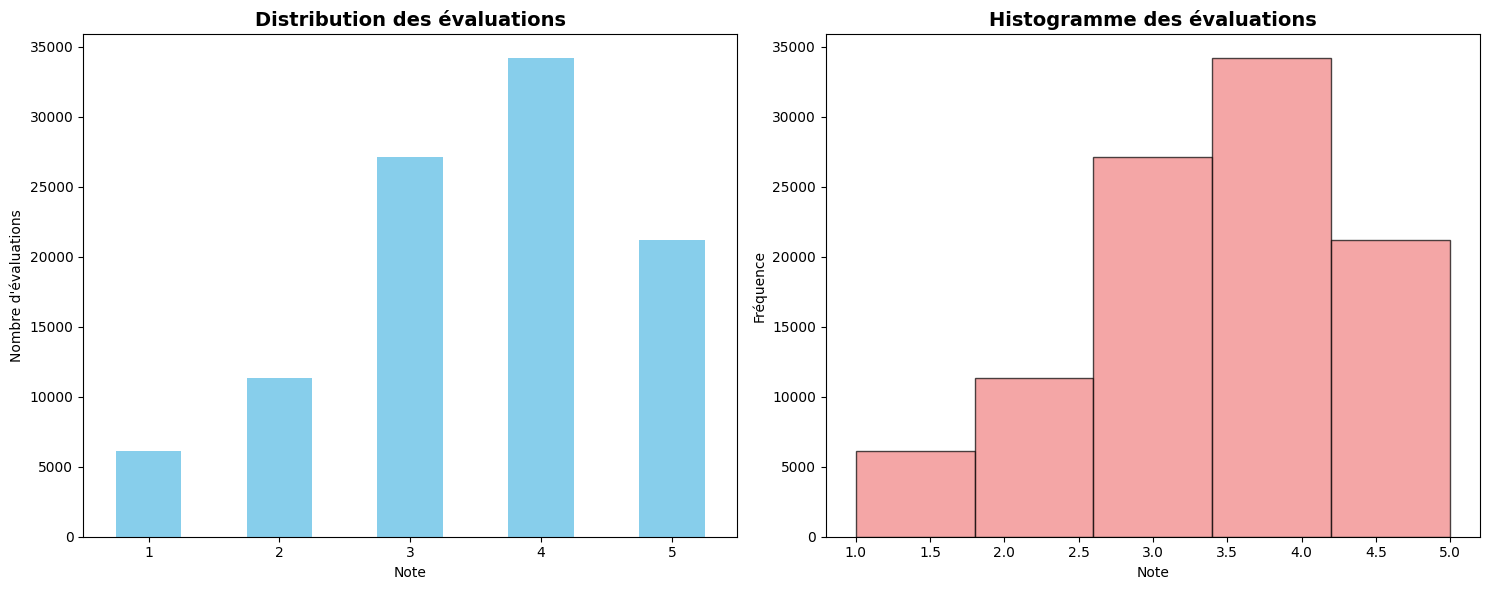

In [29]:
# Visualisation de la distribution des évaluations
plot_rating_distribution(ratings_df, save_path="figures/rating_distribution.png")

## 3. Analyse de la Popularité des Films

Étudions comment les films sont évalués et leur popularité relative.

In [30]:
# Création des statistiques par film
print("🎬 CRÉATION DES STATISTIQUES PAR FILM")
movie_stats_df = create_movie_stats(ratings_df, movies_df)

print(f"\n✅ Statistiques créées pour {len(movie_stats_df)} films")
print("\n📋 Aperçu des statistiques :")
display(movie_stats_df.head(10))

# Identification des films problématiques (très peu d'évaluations)
low_rating_films = movie_stats_df[movie_stats_df['rating_count'] <= 3]
print(f"\n⚠️  Films avec ≤3 évaluations : {len(low_rating_films)} ({len(low_rating_films)/len(movie_stats_df)*100:.1f}%)")

🎬 CRÉATION DES STATISTIQUES PAR FILM

✅ Statistiques créées pour 1682 films

📋 Aperçu des statistiques :


,movie_id,rating_count,rating_mean,rating_std,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,452,3.88,0.93,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,131,3.21,0.97,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,90,3.03,1.21,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,209,3.55,0.97,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,86,3.30,0.95,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,6,26,3.58,1.30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,7,392,3.80,0.98,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,8,219,4.00,1.00,Babe (1995),0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
8,9,299,3.90,1.04,Dead Man Walking (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,10,89,3.83,1.01,Richard III (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0



⚠️  Films avec ≤3 évaluations : 269 (16.0%)


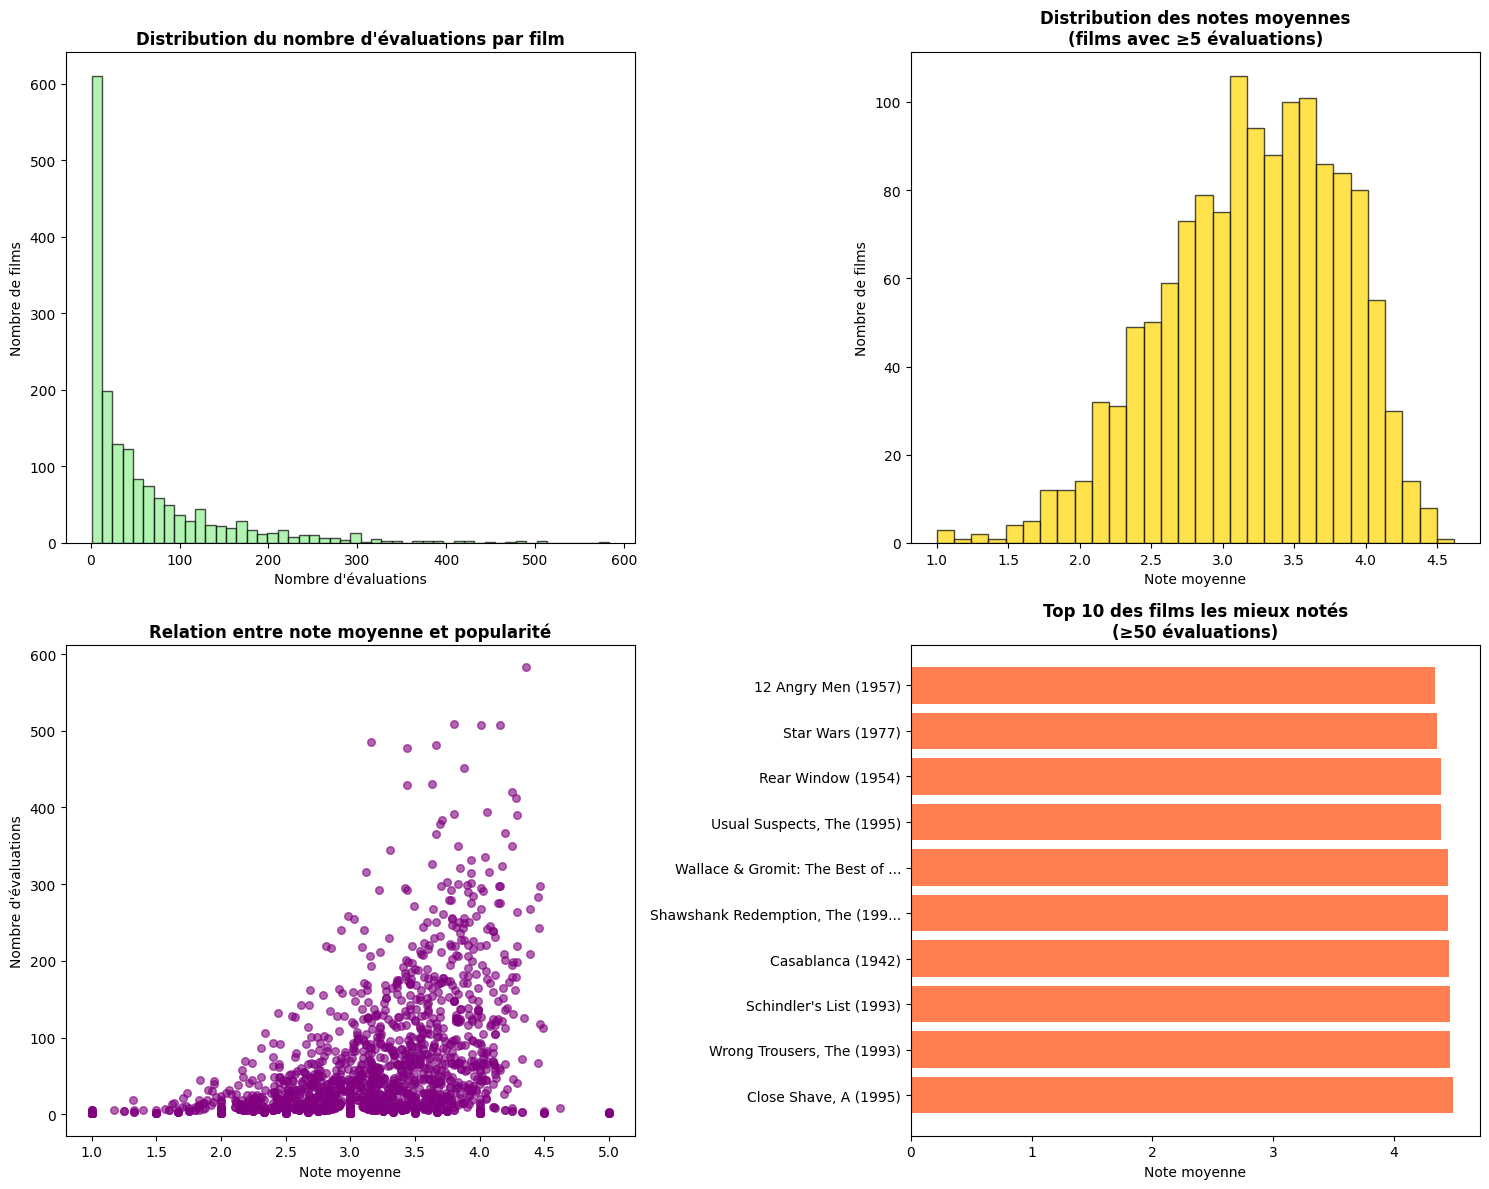

In [31]:
# Visualisation de la popularité des films
plot_movie_popularity(movie_stats_df, min_ratings=5, save_path="figures/movie_popularity.png")

### 3.1 Top Films par Catégorie

Identifions les films les plus remarquables selon différents critères.

In [32]:
# Top films par différents critères
print("🏆 TOP FILMS PAR CATÉGORIE")
print("=" * 40)

# Films les plus populaires (nombre d'évaluations)
print("\n📈 TOP 10 - Films les plus évalués :")
top_popular = movie_stats_df.nlargest(10, 'rating_count')[['title', 'rating_count', 'rating_mean']]
for idx, (_, row) in enumerate(top_popular.iterrows(), 1):
    print(f"{idx:2}. {row['title'][:40]:<40} | {row['rating_count']:3} éval. | {row['rating_mean']:.2f}⭐")

# Films les mieux notés (avec minimum 50 évaluations)
print("\n⭐ TOP 10 - Films les mieux notés (≥50 évaluations) :")
top_rated = movie_stats_df[movie_stats_df['rating_count'] >= 50].nlargest(10, 'rating_mean')
top_rated = top_rated[['title', 'rating_mean', 'rating_count']]
for idx, (_, row) in enumerate(top_rated.iterrows(), 1):
    print(f"{idx:2}. {row['title'][:40]:<40} | {row['rating_mean']:.2f}⭐ | {row['rating_count']:3} éval.")

# Films les plus controversés (écart-type élevé avec minimum 30 évaluations)
print("\n🔥 TOP 10 - Films les plus controversés (écart-type élevé, ≥30 évaluations) :")
controversial = movie_stats_df[movie_stats_df['rating_count'] >= 30].nlargest(10, 'rating_std')
controversial = controversial[['title', 'rating_std', 'rating_mean', 'rating_count']]
for idx, (_, row) in enumerate(controversial.iterrows(), 1):
    print(f"{idx:2}. {row['title'][:40]:<40} | σ={row['rating_std']:.2f} | {row['rating_mean']:.2f}⭐")

🏆 TOP FILMS PAR CATÉGORIE

📈 TOP 10 - Films les plus évalués :
 1. Star Wars (1977)                         | 583 éval. | 4.36⭐
 2. Contact (1997)                           | 509 éval. | 3.80⭐
 3. Fargo (1996)                             | 508 éval. | 4.16⭐
 4. Return of the Jedi (1983)                | 507 éval. | 4.01⭐
 5. Liar Liar (1997)                         | 485 éval. | 3.16⭐
 6. English Patient, The (1996)              | 481 éval. | 3.66⭐
 7. Scream (1996)                            | 478 éval. | 3.44⭐
 8. Toy Story (1995)                         | 452 éval. | 3.88⭐
 9. Air Force One (1997)                     | 431 éval. | 3.63⭐
10. Independence Day (ID4) (1996)            | 429 éval. | 3.44⭐

⭐ TOP 10 - Films les mieux notés (≥50 évaluations) :
 1. Close Shave, A (1995)                    | 4.49⭐ | 112 éval.
 2. Wrong Trousers, The (1993)               | 4.47⭐ | 118 éval.
 3. Schindler's List (1993)                  | 4.47⭐ | 298 éval.
 4. Casablanca (1942)                 

## 4. Analyse des Genres

Explorons les préférences de genres et leurs caractéristiques.

🎭 ANALYSE DES GENRES


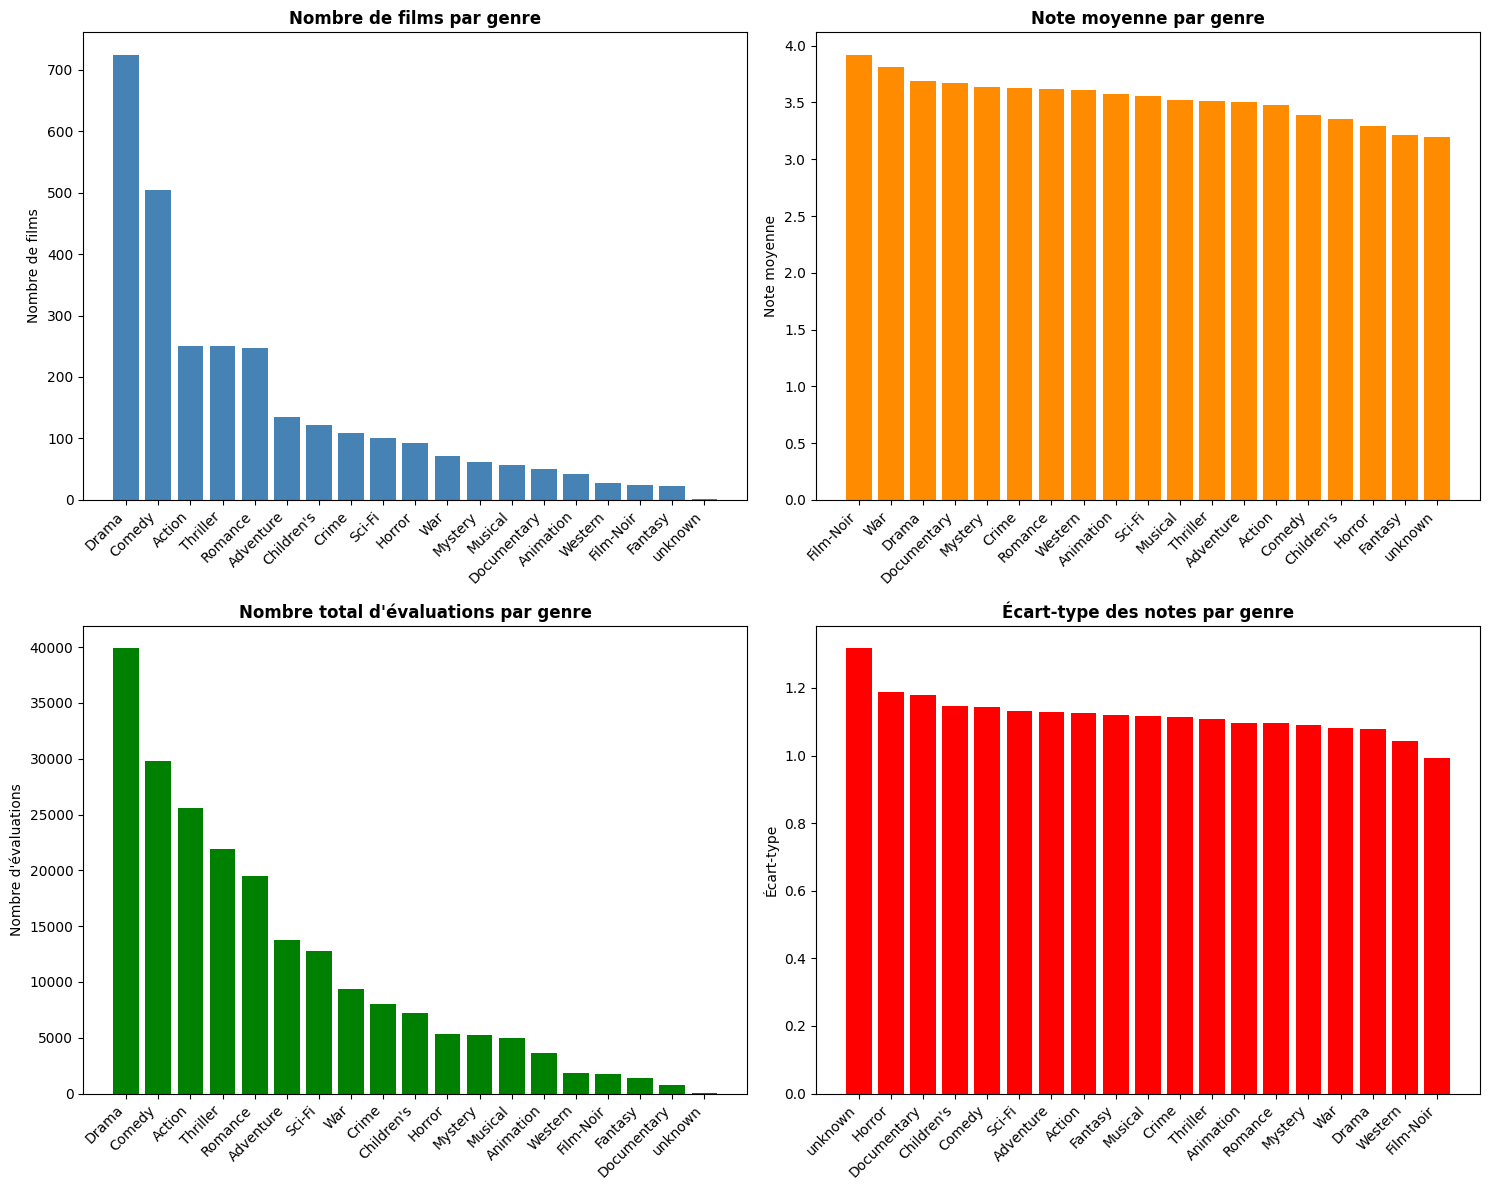


📊 Statistiques détaillées par genre :


,genre,film_count,total_ratings,avg_rating,std_rating
8,Drama,725,39895,3.687,1.079
5,Comedy,505,29832,3.394,1.143
1,Action,251,25589,3.480,1.125
16,Thriller,251,21872,3.509,1.107
14,Romance,247,19461,3.622,1.096
2,Adventure,135,13753,3.504,1.128
4,Children's,122,7182,3.353,1.147
6,Crime,109,8055,3.632,1.113
15,Sci-Fi,101,12730,3.561,1.133
11,Horror,92,5317,3.290,1.187


In [33]:
# Analyse complète des genres
print("🎭 ANALYSE DES GENRES")
genre_analysis = analyze_genres(movies_df, ratings_df, save_path="figures/genre_analysis.png")

print("\n📊 Statistiques détaillées par genre :")
display(genre_analysis.round(3))

### 4.1 Insights sur les Genres

Analysons les patterns intéressants dans les genres.

In [34]:
# Insights sur les genres
print("💡 INSIGHTS SUR LES GENRES")
print("=" * 35)

# Genre le plus populaire
most_popular_genre = genre_analysis.loc[genre_analysis['film_count'].idxmax()]
print(f"🎬 Genre le plus représenté : {most_popular_genre['genre']} ({most_popular_genre['film_count']} films)")

# Genre le mieux noté
best_rated_genre = genre_analysis.loc[genre_analysis['avg_rating'].idxmax()]
print(f"⭐ Genre le mieux noté : {best_rated_genre['genre']} ({best_rated_genre['avg_rating']:.2f}/5)")

# Genre le plus évalué
most_rated_genre = genre_analysis.loc[genre_analysis['total_ratings'].idxmax()]
print(f"📊 Genre le plus évalué : {most_rated_genre['genre']} ({most_rated_genre['total_ratings']:,} évaluations)")

# Genre le plus controversé
most_controversial_genre = genre_analysis.loc[genre_analysis['std_rating'].idxmax()]
print(f"🔥 Genre le plus controversé : {most_controversial_genre['genre']} (σ={most_controversial_genre['std_rating']:.3f})")

# Corrélation entre nombre de films et note moyenne
correlation = genre_analysis['film_count'].corr(genre_analysis['avg_rating'])
print(f"\n🔗 Corrélation nombre de films / note moyenne : {correlation:.3f}")

💡 INSIGHTS SUR LES GENRES
🎬 Genre le plus représenté : Drama (725 films)
⭐ Genre le mieux noté : Film-Noir (3.92/5)
📊 Genre le plus évalué : Drama (39,895 évaluations)
🔥 Genre le plus controversé : unknown (σ=1.317)

🔗 Corrélation nombre de films / note moyenne : 0.057


## 5. Analyse des Utilisateurs

Étudions les comportements des utilisateurs et leurs patterns d'évaluation.

In [35]:
# Analyse des comportements utilisateurs
print("👥 ANALYSE DES UTILISATEURS")
print("=" * 30)

# Statistiques par utilisateur
user_stats = ratings_df.groupby('user_id').agg({
    'rating': ['count', 'mean', 'std']
}).round(3)
user_stats.columns = ['rating_count', 'rating_mean', 'rating_std']
user_stats.reset_index(inplace=True)

# Statistiques descriptives
print("\n📊 Statistiques des utilisateurs :")
print(f"• Nombre d'évaluations par utilisateur :")
print(f"  - Moyenne : {user_stats['rating_count'].mean():.1f}")
print(f"  - Médiane : {user_stats['rating_count'].median():.1f}")
print(f"  - Min : {user_stats['rating_count'].min()}")
print(f"  - Max : {user_stats['rating_count'].max()}")

print(f"\n• Note moyenne par utilisateur :")
print(f"  - Moyenne générale : {user_stats['rating_mean'].mean():.2f}")
print(f"  - Écart-type : {user_stats['rating_mean'].std():.2f}")
print(f"  - Min : {user_stats['rating_mean'].min():.2f}")
print(f"  - Max : {user_stats['rating_mean'].max():.2f}")

# Utilisateurs extrêmes
print(f"\n🔍 Utilisateurs remarquables :")
most_active = user_stats.loc[user_stats['rating_count'].idxmax()]
print(f"• Plus actif : User {most_active['user_id']} ({most_active['rating_count']} évaluations)")

most_generous = user_stats.loc[user_stats['rating_mean'].idxmax()]
print(f"• Plus généreux : User {most_generous['user_id']} (moyenne {most_generous['rating_mean']:.2f})")

most_critical = user_stats.loc[user_stats['rating_mean'].idxmin()]
print(f"• Plus critique : User {most_critical['user_id']} (moyenne {most_critical['rating_mean']:.2f})")

👥 ANALYSE DES UTILISATEURS

📊 Statistiques des utilisateurs :
• Nombre d'évaluations par utilisateur :
  - Moyenne : 106.0
  - Médiane : 65.0
  - Min : 20
  - Max : 737

• Note moyenne par utilisateur :
  - Moyenne générale : 3.59
  - Écart-type : 0.45
  - Min : 1.49
  - Max : 4.87

🔍 Utilisateurs remarquables :
• Plus actif : User 405.0 (737.0 évaluations)
• Plus généreux : User 849.0 (moyenne 4.87)
• Plus critique : User 181.0 (moyenne 1.49)


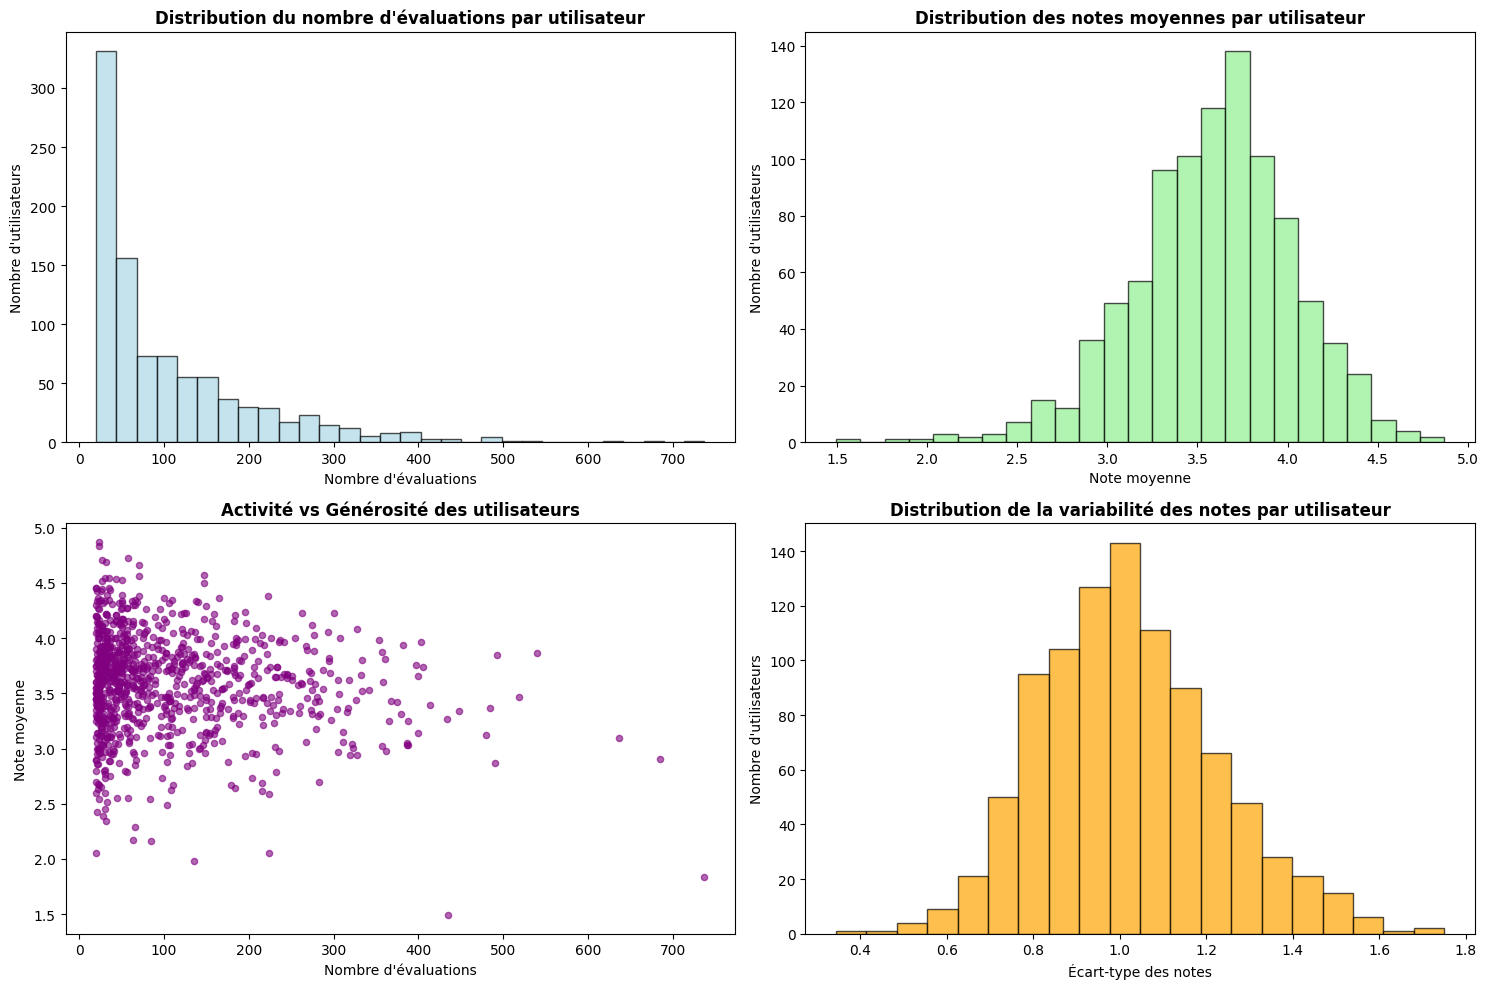

In [36]:
# Visualisation des comportements utilisateurs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution du nombre d'évaluations par utilisateur
axes[0, 0].hist(user_stats['rating_count'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Distribution du nombre d\'évaluations par utilisateur', fontweight='bold')
axes[0, 0].set_xlabel('Nombre d\'évaluations')
axes[0, 0].set_ylabel('Nombre d\'utilisateurs')

# Distribution des notes moyennes par utilisateur
axes[0, 1].hist(user_stats['rating_mean'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution des notes moyennes par utilisateur', fontweight='bold')
axes[0, 1].set_xlabel('Note moyenne')
axes[0, 1].set_ylabel('Nombre d\'utilisateurs')

# Relation activité vs générosité
axes[1, 0].scatter(user_stats['rating_count'], user_stats['rating_mean'], alpha=0.6, s=20, color='purple')
axes[1, 0].set_title('Activité vs Générosité des utilisateurs', fontweight='bold')
axes[1, 0].set_xlabel('Nombre d\'évaluations')
axes[1, 0].set_ylabel('Note moyenne')

# Distribution des écarts-types par utilisateur (variabilité des notes)
valid_std = user_stats['rating_std'].dropna()
axes[1, 1].hist(valid_std, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Distribution de la variabilité des notes par utilisateur', fontweight='bold')
axes[1, 1].set_xlabel('Écart-type des notes')
axes[1, 1].set_ylabel('Nombre d\'utilisateurs')

plt.tight_layout()
plt.savefig("figures/user_behavior.png", dpi=300, bbox_inches='tight')
plt.show()

## 6. Analyse Temporelle

Explorons l'évolution temporelle des évaluations.

In [37]:
# Conversion des timestamps et analyse temporelle
print("📅 ANALYSE TEMPORELLE")
print("=" * 25)

# Conversion des timestamps
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['date'] = ratings_df['datetime'].dt.date
ratings_df['year'] = ratings_df['datetime'].dt.year
ratings_df['month'] = ratings_df['datetime'].dt.month
ratings_df['day_of_week'] = ratings_df['datetime'].dt.day_name()

# Statistiques temporelles
print(f"📊 Période d'évaluation : {ratings_df['date'].min()} à {ratings_df['date'].max()}")
print(f"📊 Durée totale : {(ratings_df['date'].max() - ratings_df['date'].min()).days} jours")

# Évaluations par mois
monthly_ratings = ratings_df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_ratings['date'] = pd.to_datetime(monthly_ratings[['year', 'month']].assign(day=1))

# Évaluations par jour de la semaine
daily_ratings = ratings_df.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(f"\n📈 Évolution mensuelle :")
print(f"• Mois le plus actif : {monthly_ratings.loc[monthly_ratings['count'].idxmax(), 'date'].strftime('%B %Y')} ({monthly_ratings['count'].max():,} évaluations)")
print(f"• Mois le moins actif : {monthly_ratings.loc[monthly_ratings['count'].idxmin(), 'date'].strftime('%B %Y')} ({monthly_ratings['count'].min():,} évaluations)")

print(f"\n📅 Répartition par jour de la semaine :")
for day, count in daily_ratings.items():
    percentage = (count / daily_ratings.sum()) * 100
    print(f"• {day} : {count:,} évaluations ({percentage:.1f}%)")

📅 ANALYSE TEMPORELLE
📊 Période d'évaluation : 1997-09-20 à 1998-04-22
📊 Durée totale : 214 jours

📈 Évolution mensuelle :
• Mois le plus actif : November 1997 (23,980 évaluations)
• Mois le moins actif : September 1997 (6,704 évaluations)

📅 Répartition par jour de la semaine :
• Monday : 13,174 évaluations (13.2%)
• Tuesday : 13,933 évaluations (13.9%)
• Wednesday : 16,621 évaluations (16.6%)
• Thursday : 13,364 évaluations (13.4%)
• Friday : 15,918 évaluations (15.9%)
• Saturday : 15,077 évaluations (15.1%)
• Sunday : 11,913 évaluations (11.9%)


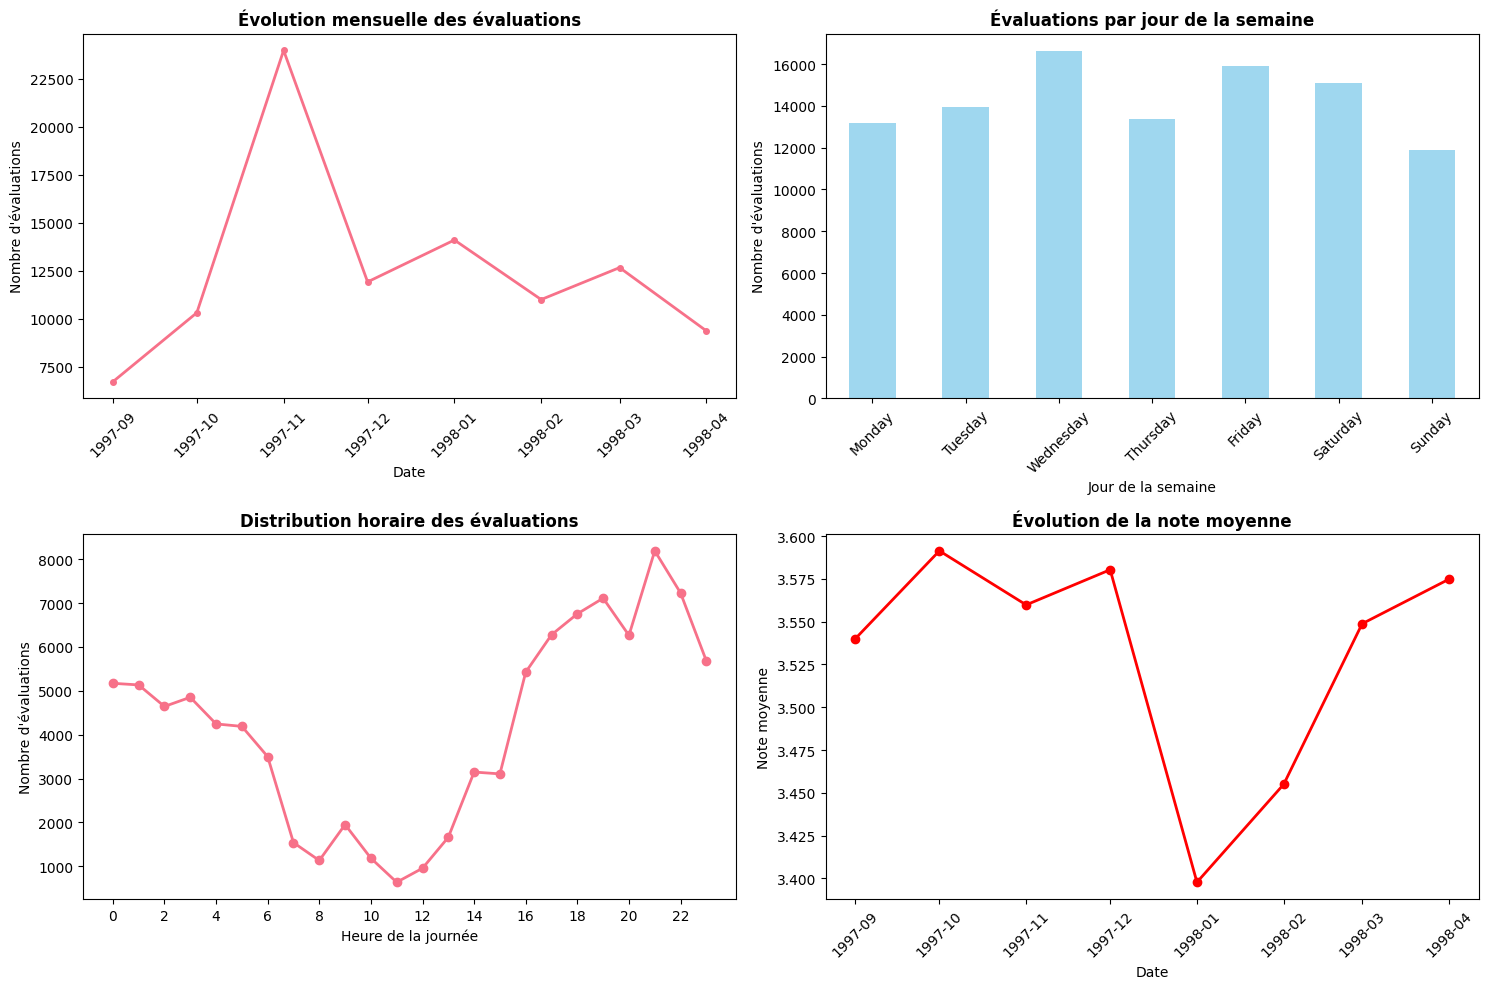

In [38]:
# Visualisation temporelle
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Évolution mensuelle
axes[0, 0].plot(monthly_ratings['date'], monthly_ratings['count'], marker='o', linewidth=2, markersize=4)
axes[0, 0].set_title('Évolution mensuelle des évaluations', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Nombre d\'évaluations')
axes[0, 0].tick_params(axis='x', rotation=45)

# Répartition par jour de la semaine
daily_ratings.plot(kind='bar', ax=axes[0, 1], color='skyblue', alpha=0.8)
axes[0, 1].set_title('Évaluations par jour de la semaine', fontweight='bold')
axes[0, 1].set_xlabel('Jour de la semaine')
axes[0, 1].set_ylabel('Nombre d\'évaluations')
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribution des heures d'évaluation
ratings_df['hour'] = ratings_df['datetime'].dt.hour
hourly_ratings = ratings_df.groupby('hour').size()
axes[1, 0].plot(hourly_ratings.index, hourly_ratings.values, marker='o', linewidth=2)
axes[1, 0].set_title('Distribution horaire des évaluations', fontweight='bold')
axes[1, 0].set_xlabel('Heure de la journée')
axes[1, 0].set_ylabel('Nombre d\'évaluations')
axes[1, 0].set_xticks(range(0, 24, 2))

# Évolution de la note moyenne dans le temps
monthly_avg_rating = ratings_df.groupby(['year', 'month'])['rating'].mean().reset_index()
monthly_avg_rating['date'] = pd.to_datetime(monthly_avg_rating[['year', 'month']].assign(day=1))
axes[1, 1].plot(monthly_avg_rating['date'], monthly_avg_rating['rating'], marker='o', linewidth=2, color='red')
axes[1, 1].set_title('Évolution de la note moyenne', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Note moyenne')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("figures/temporal_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

## 7. Détection des Biais et Valeurs Aberrantes

Identifions les potentiels problèmes dans les données qui pourraient affecter notre système de recommandation.

In [39]:
# Détection des biais et valeurs aberrantes
print("🔍 DÉTECTION DES BIAIS ET VALEURS ABERRANTES")
print("=" * 50)

# 1. Films avec très peu d'évaluations mais notes extrêmes
print("⚠️  Films potentiellement problématiques :")
low_count_high_rating = movie_stats_df[
    (movie_stats_df['rating_count'] <= 5) & 
    (movie_stats_df['rating_mean'] >= 4.5)
]
print(f"• Films avec ≤5 évaluations mais note ≥4.5 : {len(low_count_high_rating)}")

low_count_low_rating = movie_stats_df[
    (movie_stats_df['rating_count'] <= 5) & 
    (movie_stats_df['rating_mean'] <= 2.0)
]
print(f"• Films avec ≤5 évaluations mais note ≤2.0 : {len(low_count_low_rating)}")

# 2. Utilisateurs avec comportements extrêmes
extreme_users = user_stats[
    (user_stats['rating_mean'] <= 2.0) | 
    (user_stats['rating_mean'] >= 4.5)
]
print(f"• Utilisateurs avec notes moyennes extrêmes (≤2.0 ou ≥4.5) : {len(extreme_users)}")

# 3. Analyse de la distribution des notes par utilisateur
user_rating_counts = ratings_df.groupby('user_id')['rating'].value_counts().unstack(fill_value=0)
users_only_5 = ((user_rating_counts > 0).sum(axis=1) == 1) & (user_rating_counts[5] > 0)
users_only_1 = ((user_rating_counts > 0).sum(axis=1) == 1) & (user_rating_counts[1] > 0)
users_only_5 = users_only_5.sum()
users_only_1 = users_only_1.sum()

print(f"• Utilisateurs donnant uniquement des 5⭐ : {users_only_5}")
print(f"• Utilisateurs donnant uniquement des 1⭐ : {users_only_1}")

# 4. Films sans genre défini
genre_columns = [col for col in movies_df.columns if col not in 
                ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']]
movies_no_genre = movies_df[movies_df[genre_columns].sum(axis=1) == 0]
print(f"• Films sans genre défini : {len(movies_no_genre)}")

# 5. Analyse des valeurs manquantes
print(f"\n📊 Valeurs manquantes :")
for df_name, df in [("ratings", ratings_df), ("movies", movies_df), ("users", users_df)]:
    missing = df.isnull().sum()
    missing_cols = missing[missing > 0]
    if len(missing_cols) > 0:
        print(f"• {df_name.capitalize()} : {missing_cols.to_dict()}")
    else:
        print(f"• {df_name.capitalize()} : Aucune valeur manquante")

🔍 DÉTECTION DES BIAIS ET VALEURS ABERRANTES
⚠️  Films potentiellement problématiques :
• Films avec ≤5 évaluations mais note ≥4.5 : 14
• Films avec ≤5 évaluations mais note ≤2.0 : 144
• Utilisateurs avec notes moyennes extrêmes (≤2.0 ou ≥4.5) : 16
• Utilisateurs donnant uniquement des 5⭐ : 0
• Utilisateurs donnant uniquement des 1⭐ : 0
• Films sans genre défini : 0

📊 Valeurs manquantes :
• Ratings : Aucune valeur manquante
• Movies : {'release_date': 1, 'video_release_date': 1682, 'imdb_url': 3}
• Users : Aucune valeur manquante


### 7.1 Recommandations pour le Nettoyage

Basé sur notre analyse, voici nos recommandations pour améliorer la qualité des données.

In [40]:
# Recommandations de nettoyage
print("💡 RECOMMANDATIONS POUR LE NETTOYAGE DES DONNÉES")
print("=" * 55)

print("🎯 Actions recommandées :")
print("\n1. 📊 Filtrage par nombre minimum d'évaluations :")
print(f"   • Films : Considérer uniquement les films avec ≥10 évaluations")
print(f"   • Utilisateurs : Considérer uniquement les utilisateurs avec ≥20 évaluations")

print("\n2. 🔍 Gestion des valeurs aberrantes :")
print("   • Investiguer les films avec des notes parfaites mais très peu d'évaluations")
print("   • Appliquer une régularisation bayésienne pour les films peu évalués")

print("\n3. ⚖️  Équilibrage des données :")
print("   • Considérer une pondération inverse de la popularité pour réduire le biais")
print("   • Normaliser les notes par utilisateur pour corriger les biais individuels")

print("\n4. 🏷️  Traitement des métadonnées :")
if len(movies_no_genre) > 0:
    print(f"   • Assigner des genres aux {len(movies_no_genre)} films non catégorisés")
print("   • Extraire l'année de sortie depuis le titre ou la date")

# Calcul de statistiques après filtrage recommandé
min_movie_ratings = 10
min_user_ratings = 20

valid_movies = movie_stats_df[movie_stats_df['rating_count'] >= min_movie_ratings]['movie_id']
valid_users = user_stats[user_stats['rating_count'] >= min_user_ratings]['user_id']
clean_ratings = ratings_df[
    (ratings_df['movie_id'].isin(valid_movies)) & 
    (ratings_df['user_id'].isin(valid_users))
]

print(f"\n📈 Impact du nettoyage proposé :")
print(f"• Données originales : {len(ratings_df):,} évaluations, {len(movies_df)} films, {len(users_df)} utilisateurs")
print(f"• Après nettoyage : {len(clean_ratings):,} évaluations ({len(clean_ratings)/len(ratings_df)*100:.1f}%)")
print(f"                    {len(valid_movies)} films ({len(valid_movies)/len(movies_df)*100:.1f}%)")
print(f"                    {len(valid_users)} utilisateurs ({len(valid_users)/len(users_df)*100:.1f}%)")

💡 RECOMMANDATIONS POUR LE NETTOYAGE DES DONNÉES
🎯 Actions recommandées :

1. 📊 Filtrage par nombre minimum d'évaluations :
   • Films : Considérer uniquement les films avec ≥10 évaluations
   • Utilisateurs : Considérer uniquement les utilisateurs avec ≥20 évaluations

2. 🔍 Gestion des valeurs aberrantes :
   • Investiguer les films avec des notes parfaites mais très peu d'évaluations
   • Appliquer une régularisation bayésienne pour les films peu évalués

3. ⚖️  Équilibrage des données :
   • Considérer une pondération inverse de la popularité pour réduire le biais
   • Normaliser les notes par utilisateur pour corriger les biais individuels

4. 🏷️  Traitement des métadonnées :
   • Extraire l'année de sortie depuis le titre ou la date

📈 Impact du nettoyage proposé :
• Données originales : 100,000 évaluations, 1682 films, 943 utilisateurs
• Après nettoyage : 97,953 évaluations (98.0%)
                    1152 films (68.5%)
                    943 utilisateurs (100.0%)


## 8. Préparation pour le Système de Recommandation

Créons les structures de données nécessaires pour développer notre système de recommandation.

In [41]:
# Création de la matrice utilisateur-film
print("🔧 PRÉPARATION DES DONNÉES POUR LA RECOMMANDATION")
print("=" * 50)

# Matrice utilisateur-film complète
print("\n📊 Création de la matrice utilisateur-film...")
user_movie_matrix = create_user_movie_matrix(ratings_df)

# Matrice nettoyée
print("\n🧹 Création de la matrice nettoyée...")
clean_matrix = create_user_movie_matrix(clean_ratings)

print(f"\n📈 Comparaison des matrices :")
print(f"• Matrice complète : {user_movie_matrix.shape}")
print(f"• Matrice nettoyée : {clean_matrix.shape}")
print(f"• Réduction de taille : {(1 - clean_matrix.size/user_movie_matrix.size)*100:.1f}%")

🔧 PRÉPARATION DES DONNÉES POUR LA RECOMMANDATION

📊 Création de la matrice utilisateur-film...
Matrice créée : 943 utilisateurs × 1682 films
Densité de la matrice : 6.30%

🧹 Création de la matrice nettoyée...
Matrice créée : 943 utilisateurs × 1152 films
Densité de la matrice : 9.02%

📈 Comparaison des matrices :
• Matrice complète : (943, 1682)
• Matrice nettoyée : (943, 1152)
• Réduction de taille : 31.5%


In [42]:
# Analyse de la sparsité
print("\n🕳️  ANALYSE DE LA SPARSITÉ")
print("=" * 30)

def analyze_sparsity(matrix, name):
    total_cells = matrix.size
    non_zero_cells = (matrix != 0).sum().sum()
    sparsity = (total_cells - non_zero_cells) / total_cells
    
    print(f"\n📊 {name} :")
    print(f"• Taille : {matrix.shape[0]:,} × {matrix.shape[1]:,}")
    print(f"• Cellules totales : {total_cells:,}")
    print(f"• Cellules non-nulles : {non_zero_cells:,}")
    print(f"• Sparsité : {sparsity:.2%}")
    print(f"• Densité : {(1-sparsity):.2%}")

analyze_sparsity(user_movie_matrix, "Matrice complète")
analyze_sparsity(clean_matrix, "Matrice nettoyée")


🕳️  ANALYSE DE LA SPARSITÉ

📊 Matrice complète :
• Taille : 943 × 1,682
• Cellules totales : 1,586,126
• Cellules non-nulles : 100,000
• Sparsité : 93.70%
• Densité : 6.30%

📊 Matrice nettoyée :
• Taille : 943 × 1,152
• Cellules totales : 1,086,336
• Cellules non-nulles : 97,953
• Sparsité : 90.98%
• Densité : 9.02%


## 9. Exemple Simple de Recommandation

Implémentons un système de recommandation basique basé sur la popularité pour démontrer l'utilisation des données.

In [43]:
# Système de recommandation basique
from utils import get_movie_recommendations_preview

print("🎬 EXEMPLE DE SYSTÈME DE RECOMMANDATION")
print("=" * 45)

# Choisir un utilisateur au hasard
sample_user_id = ratings_df['user_id'].sample(1).iloc[0]
user_ratings = ratings_df[ratings_df['user_id'] == sample_user_id]

print(f"👤 Utilisateur sélectionné : User {sample_user_id}")
print(f"📊 Nombre de films évalués : {len(user_ratings)}")
print(f"⭐ Note moyenne : {user_ratings['rating'].mean():.2f}")

print(f"\n🎭 Derniers films évalués par l'utilisateur :")
recent_ratings = user_ratings.merge(movies_df[['movie_id', 'title']], on='movie_id').tail(5)
for _, row in recent_ratings.iterrows():
    print(f"• {row['title'][:50]:<50} | {row['rating']}⭐")

# Générer des recommandations
print(f"\n🎯 Recommandations pour User {sample_user_id} :")
recommendations = get_movie_recommendations_preview(ratings_df, movies_df, sample_user_id, top_n=10)

for idx, row in recommendations.iterrows():
    print(f"{idx+1:2}. {row['title'][:45]:<45} | {row['rating_mean']:.2f}⭐ ({row['rating_count']} éval.)")

🎬 EXEMPLE DE SYSTÈME DE RECOMMANDATION
👤 Utilisateur sélectionné : User 655
📊 Nombre de films évalués : 685
⭐ Note moyenne : 2.91

🎭 Derniers films évalués par l'utilisateur :
• Once Upon a Time in America (1984)                 | 3⭐
• Ice Storm, The (1997)                              | 4⭐
• American President, The (1995)                     | 3⭐
• Love Jones (1997)                                  | 3⭐
• Love and Death on Long Island (1997)               | 4⭐

🎯 Recommandations pour User 655 :
 1. Close Shave, A (1995)                         | 4.49⭐ (112 éval.)
 2. Wrong Trousers, The (1993)                    | 4.47⭐ (118 éval.)
 3. Wallace & Gromit: The Best of Aardman Animati | 4.45⭐ (67 éval.)
 4. Maltese Falcon, The (1941)                    | 4.21⭐ (138 éval.)
 5. Paths of Glory (1957)                         | 4.21⭐ (33 éval.)
 6. Sunset Blvd. (1950)                           | 4.20⭐ (65 éval.)
 7. Bridge on the River Kwai, The (1957)          | 4.18⭐ (165 éval.)
 8. Princess

## 10. Conclusions et Prochaines Étapes

### 📊 Résumé des Insights

**Structure des données :**
- Dataset bien structuré avec 100K évaluations, 943 utilisateurs, 1682 films
- Sparsité élevée (~93.7%) typique des données de recommandation
- Distribution des notes légèrement biaisée vers les valeurs positives

**Patterns identifiés :**
- Films populaires généralement mieux notés
- Biais de popularité important (80/20 rule)
- Comportements utilisateurs variés (généreux vs critiques)
- Genres Drama, Comedy, Action dominent

**Problèmes détectés :**
- Films avec très peu d'évaluations mais notes extrêmes
- Utilisateurs avec comportements aberrants
- Nécessité de filtrage et normalisation

### 🚀 Prochaines Étapes

1. **Implémentation d'algorithmes de recommandation :**
   - Collaborative Filtering (User-based, Item-based)
   - Matrix Factorization (SVD, NMF)
   - Approches hybrides

2. **Évaluation des performances :**
   - Métriques : RMSE, MAE, Precision@K, Recall@K
   - Cross-validation temporelle
   - Tests A/B pour l'expérience utilisateur

3. **Optimisations avancées :**
   - Gestion du cold start problem
   - Intégration des métadonnées (genres, âge des films)
   - Recommandations contextuelles

4. **Déploiement :**
   - API de recommandation
   - Interface utilisateur
   - Monitoring et amélioration continue

In [44]:
# Sauvegarde des données traitées
print("💾 SAUVEGARDE DES DONNÉES TRAITÉES")
print("=" * 40)

# Sauvegarde des DataFrames principaux
try:
    # Données enrichies
    ratings_df.to_csv('processed_data/ratings_enriched.csv', index=False)
    movie_stats_df.to_csv('processed_data/movie_statistics.csv', index=False)
    user_stats.to_csv('processed_data/user_statistics.csv', index=False)
    genre_analysis.to_csv('processed_data/genre_analysis.csv', index=False)
    
    # Matrices pour la recommandation
    user_movie_matrix.to_csv('processed_data/user_movie_matrix.csv')
    clean_matrix.to_csv('processed_data/clean_user_movie_matrix.csv')
    
    print("✅ Données sauvegardées avec succès dans le dossier 'processed_data/'")
    print("📁 Fichiers créés :")
    print("   • ratings_enriched.csv - Évaluations avec données temporelles")
    print("   • movie_statistics.csv - Statistiques par film")
    print("   • user_statistics.csv - Statistiques par utilisateur")
    print("   • genre_analysis.csv - Analyse des genres")
    print("   • user_movie_matrix.csv - Matrice utilisateur-film complète")
    print("   • clean_user_movie_matrix.csv - Matrice nettoyée")
    
except Exception as e:
    print(f"❌ Erreur lors de la sauvegarde : {e}")
    print("💡 Créez le dossier 'processed_data/' si nécessaire")

print("\n" + "="*60)
print("✨ ANALYSE EXPLORATOIRE TERMINÉE !")
print("="*60)

💾 SAUVEGARDE DES DONNÉES TRAITÉES
✅ Données sauvegardées avec succès dans le dossier 'processed_data/'
📁 Fichiers créés :
   • ratings_enriched.csv - Évaluations avec données temporelles
   • movie_statistics.csv - Statistiques par film
   • user_statistics.csv - Statistiques par utilisateur
   • genre_analysis.csv - Analyse des genres
   • user_movie_matrix.csv - Matrice utilisateur-film complète
   • clean_user_movie_matrix.csv - Matrice nettoyée

✨ ANALYSE EXPLORATOIRE TERMINÉE !
